## 템플릿 매칭
![img](https://i.ibb.co/S3NMk6p/BxlAAAT.png)

- 템플릿 매칭은 위와 같이 원본 이미지에서 템플릿(샘플)이미지와 일치하는 영역을 찾는 알고리즘입니다.
템플릿 이미지를 왼쪽 상단부터 옮겨가며 원본 이미지와 템플릿 이미지를 비교합니다.

- `cv2.matchTemplate()` 함수는 위와 같은 방식으로 원본 이미지의 우측 하단까지 비교를 수행한 후
'cv2.minMaxLoc()' 함수를 이용해 결과값의 최댓값과 최솟값을 얻을 수 있습니다.


- 원본 이미지와 템플릿 이미지를 비교하는 연산 방법에는 여러가지가 있고,
템플릿 매칭을 수행하는 OpenCV 함수 `cv2.matchTemplate()` 의 파라미터로 연산의 종류를 결정할 수 있습니다.
- 연산 방법에 따라 결과값의 최솟값이 원하는 값일 수도, 최댓값이 원하는 값일 수도 있습니다.

In [62]:
import cv2
import matplotlib.pyplot as plt

In [63]:
img = cv2.imread('./img/template_origin.png')
template = cv2.imread('./img/template.png')

# 템플릿 이미지 크기 가져오기
template_h , template_w = template.shape[:2]

In [64]:
img_draw = img.copy()
# 템플릿 매칭
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
# 최대, 최솟값과 그 좌표
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
match_val = max_val

In [65]:
# 매칭된 자표 구해서 사각형 표시
bottom_right = (top_left[0] + template_w, top_left[1] + template_h)
cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
# 매칭 점수 표시
cv2.putText(img_draw, str(match_val), top_left, cv2.FONT_HERSHEY_PLAIN, 2,(0,0,0), 1, cv2.LINE_AA)

array([[[ 85,  87, 157],
        [ 95,  96, 164],
        [101,  97, 163],
        ...,
        [218, 220, 214],
        [218, 220, 214],
        [218, 220, 214]],

       [[ 96,  98, 162],
        [105, 105, 169],
        [110, 107, 169],
        ...,
        [218, 220, 214],
        [218, 220, 214],
        [218, 220, 214]],

       [[106, 110, 163],
        [112, 114, 168],
        [118, 116, 168],
        ...,
        [218, 219, 215],
        [218, 220, 214],
        [219, 221, 215]],

       ...,

       [[ 96, 142, 176],
        [ 94, 141, 173],
        [ 93, 140, 172],
        ...,
        [181, 201, 206],
        [181, 201, 206],
        [181, 201, 206]],

       [[ 97, 146, 178],
        [ 95, 144, 176],
        [ 93, 142, 174],
        ...,
        [180, 200, 205],
        [180, 200, 205],
        [180, 200, 205]],

       [[ 98, 149, 181],
        [ 96, 147, 179],
        [ 93, 145, 175],
        ...,
        [179, 199, 204],
        [179, 199, 204],
        [179, 199, 204]]

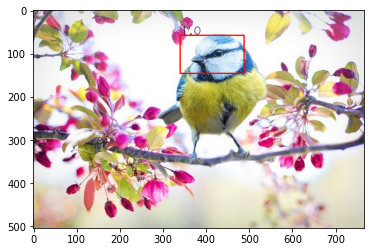

In [66]:
# 이미지 표시
img_draw = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)
plt.imshow(img_draw)


## Haar like Feature

![img](https://t1.daumcdn.net/cfile/tistory/2631DA41581154882A)


- Haar Cascade라고 불리는 Haar like feature는 사람 얼굴에서 특징을 추출하는 방법이다.
- 사람 얼굴의 생김새가 다양하더라도 명암의 차이는 거의 없을것이라는 아이디어를 기반으로 만들어졌다.
- 얼굴에 있는 각 부위의 명암 특성을 이용해 특징을 추출하는데, 명암 필터의 모양과 적용 방법이 컨볼루션 커널과 흡사하다.

In [67]:
import cv2
import matplotlib.pyplot as plt

In [68]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontface.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [69]:
img = cv2.imread('img/haar_sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

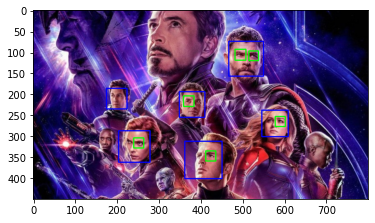

In [70]:
# 얼굴 특징 검출
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    # 얼굴 위치 표시
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 눈 위치 검출을 위해 변환
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # 눈 특징 검출
    eyes = eye_cascade.detectMultiScale(roi_gray)
    # 눈 위치 표시
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)